# Supervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import mglearn

이번 노트북에서는 Chapter 2 에서 사용되는 데이터셋을 중점적으로 살펴보자.

아무래도 머신러닝 알고리즘들을 적용시키기 전에 데이터를 완벽하게 알고 해야, 어떻게 결과가 나올지 미리 예측이 되니깐 말야.

### Dataset: make_forge

이거는 `mglearn.datasets` 안에 있는 함수임. 소스코드는 아래에 있음.

In [2]:
def make_forge():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y

make_blobs 는 [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) 온 것임

In [3]:
from sklearn.datasets import make_blobs
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers 

`make_blobs()`는 랜덤한 등방성 가우시안 (?) 블랍을 보내준다고 (뭔소리냐?) 랜덤을 만들어주는데 뭐낙 잘만들어주나보다.

Chapter 1 에서 조사한 scatter 방법으로 보자.

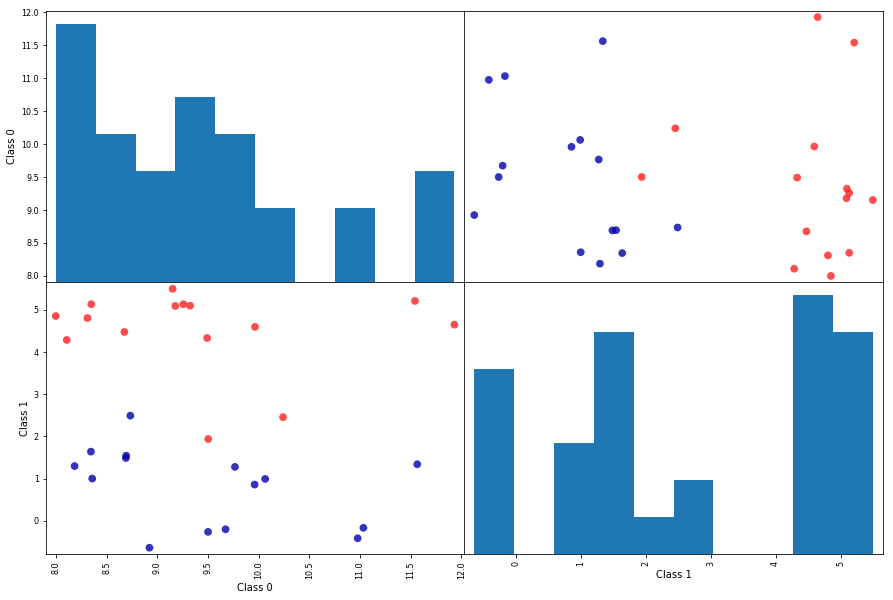

In [4]:
X, y = make_blobs(centers=2, random_state=4, n_samples=30)
df = pd.DataFrame(X, columns=['Class 0', 'Class 1'])
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 10), marker='o',
                           s=60, alpha=.8, cmap=mglearn.cm2);

`make_forge()` 는 파라메터를 아주 잘 넣어서 뭔가 머신러닝이 더 잘먹히도록 만든듯. 그림을 그려서 보면?

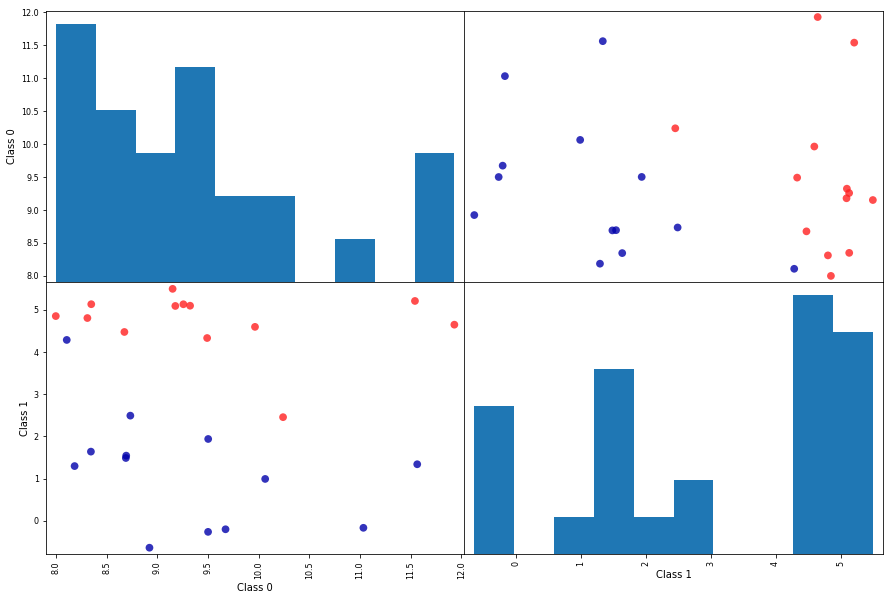

In [5]:
X, y = make_forge()
df = pd.DataFrame(X, columns=['Class 0', 'Class 1'])
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 10), marker='o',
                           s=60, alpha=.8, cmap=mglearn.cm2);

응, 몇개 점을 바꾸어놓았네. 나중에 뭔가 더 잘되나보다...

### Dataset: make_wave

이것도 `mglearn.datasets` 안에 있는 함수임. 소스코드는 아래에 있음.

In [6]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

아주 간단하다. [-3, 3]의 uniform random 을 만든 후에 noise 를 약간 섞어준다.

이거는 feature 도 하나밖에 없다. y 가 실수범위이니 regression 에 사용하는 데이터셋이군.

그냥 그려보면...

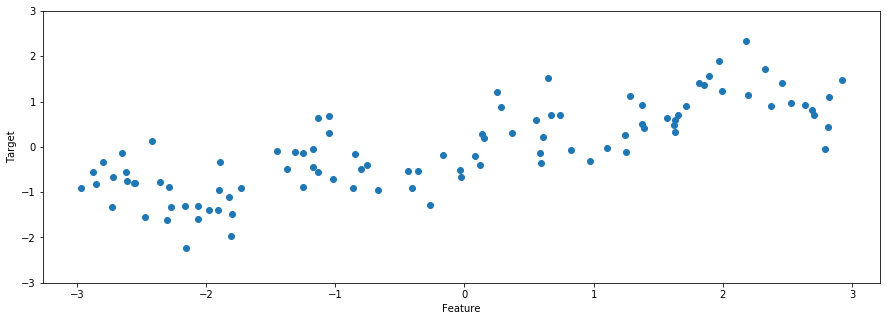

In [7]:
X, y = make_wave()
plt.figure(figsize=(15, 5))
plt.xlabel("Feature")
plt.ylabel("Target")
plt.ylim(-3, 3)
plt.plot(X, y, 'o');

### Dataset: breast_cancer

이 데이터셋은 `sklearn.datasets`에 있다.

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


답은 암이냐, 마느냐 (binary) 이지만, feature 가 엄청나다.

In [11]:
df = pd.DataFrame(X_train, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
4,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


기존에 보던대로 scatter plotting 을 해보면... 이상할거 알지만 그래도 해보자!

In [12]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

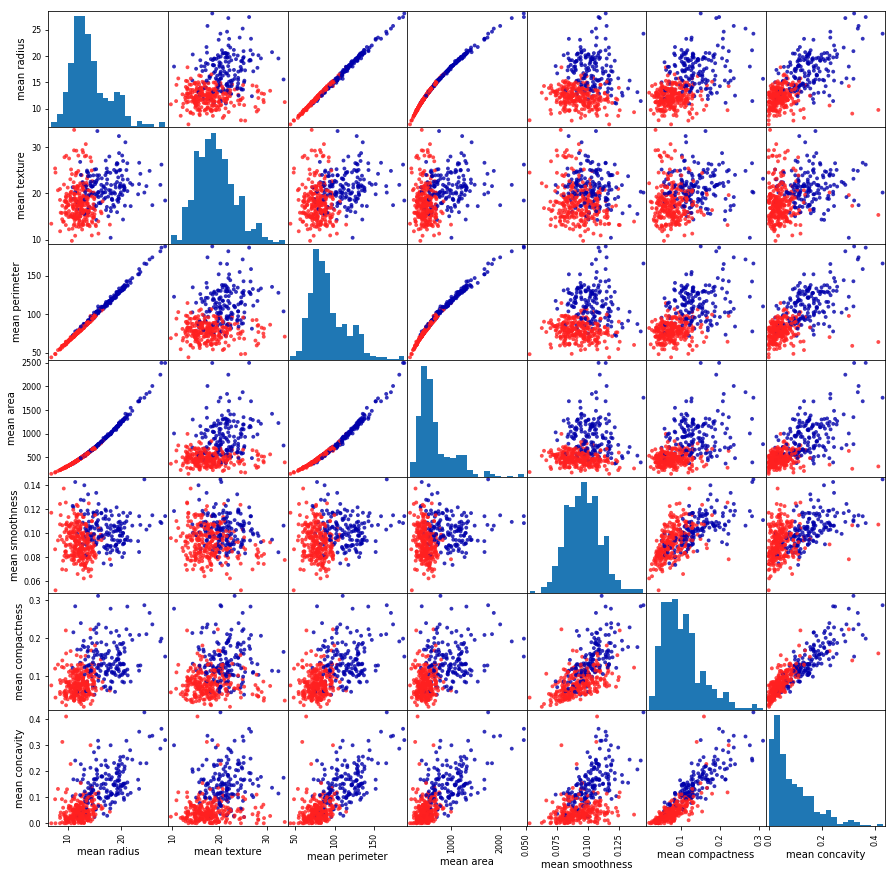

In [13]:
pd.plotting.scatter_matrix(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                               'mean smoothness', 'mean compactness', 'mean concavity']],
                           c=y_train, figsize=(15, 15), marker='.',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm2);

pair 로 짝지어서 보니 역시나 뭔가 분류가 좀 있다. 나중에 머신러닝 잘 먹히겠네.

이 방법도 좋지만 feature 가 너무 많으니 보기가 어렵다. 각각 어떤 레인지로 데이터를 가지고 있나를 보고 싶다.

역시나, Chapter 3에 방법이 나온다.

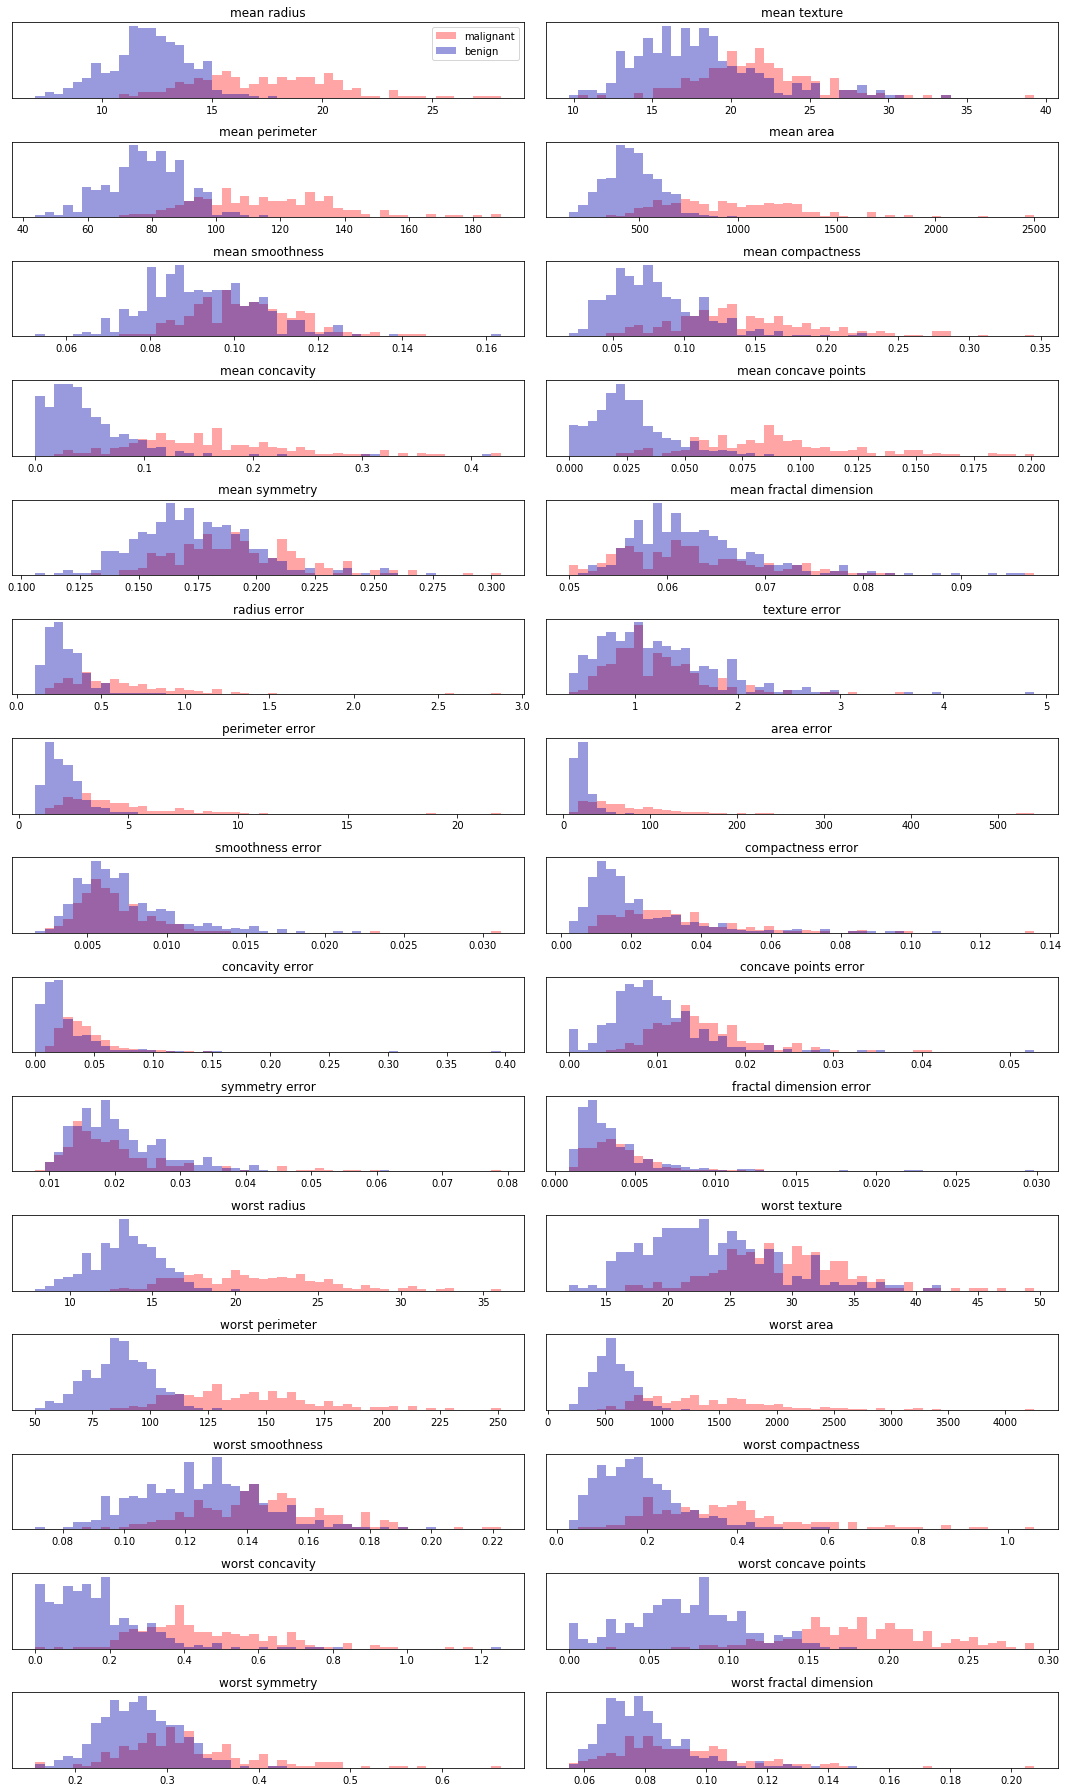

In [14]:
columns = len(df.columns)
fig, axes = plt.subplots(columns // 2, 2, figsize=(15, 25))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(columns):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm2(1), alpha=.4)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm2(0), alpha=.4)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
#ax[0].set_xlabel("Feature magnitude")
#ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout();

### Dataset: boston

이 데이터셋은 `sklearn.datasets`에 있다. `mglearn`에서 extended 버전을 만들었다.

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [16]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

어떻게 extension 했을까? `mglearn`에 있는 `MinMaxScalar()`를 사용하고 `PolynomialFeatures()`를 사용해서 feature 갯수를 늘려줌. lol

In [17]:
def load_extended_boston():
    boston = load_boston()
    X = boston.data

    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

어떻게 104가 나오냐? `sum(range(0, 14)) + 13`

우선 어떤 데이터셋인지 이해해보자. 보스턴 집값에 대한 데이터라네.

In [18]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

기존 방식으로 찍어보면...

In [19]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

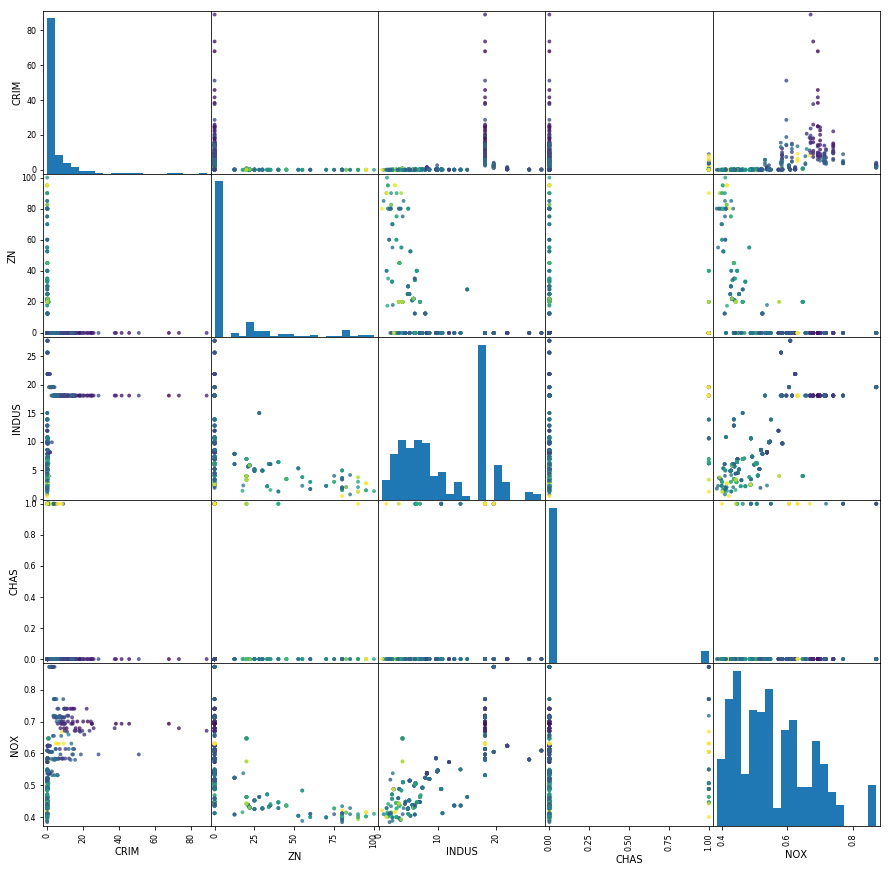

In [21]:
pd.plotting.scatter_matrix(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']],
                           c=boston.target, figsize=(15, 15), marker='.',
                           hist_kwds={'bins': 20}, s=60, alpha=.8);

뭔가 굉장히 난해하다. target 이 여러개니 보기가 힘든듯. :(

책에서도 더 자세한 분석은 나오지 않는다. 나중에 고민해보고 업데이터하자!

### Dataset: make_moons

이 데이터셋은 `sklearn.datasets`에 있다. "Make two interleaving half circles" 라는군...

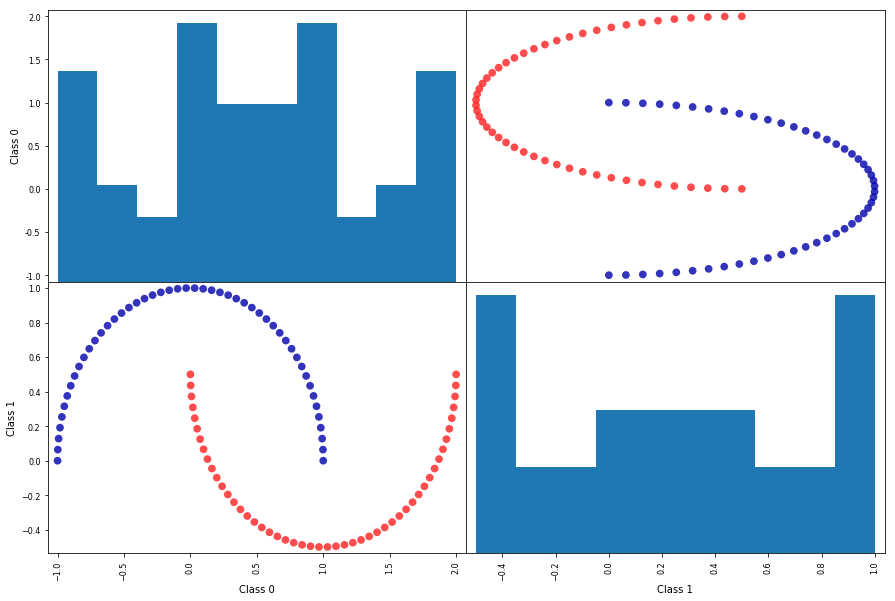

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons()
df = pd.DataFrame(X, columns=['Class 0', 'Class 1'])
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 10), marker='o',
                           s=60, alpha=.8, cmap=mglearn.cm2);

### Dataset: make_circles

이 데이터셋은 `sklearn.datasets`에 있다. "Make a large circle containing a smaller circle in 2d" 라는군... 이것도 명확할듯?

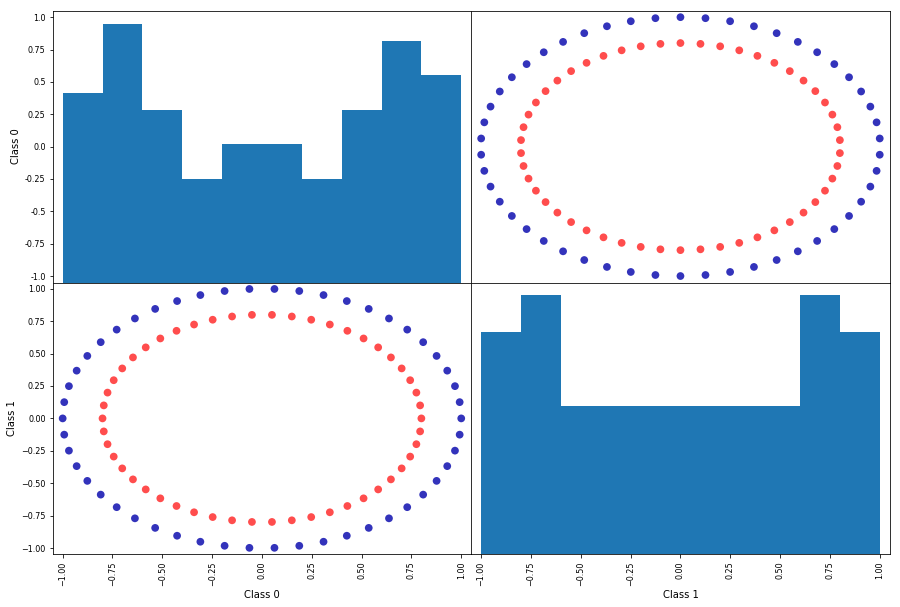

In [23]:
from sklearn.datasets import make_circles
X, y = make_circles()
df = pd.DataFrame(X, columns=['Class 0', 'Class 1'])
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 10), marker='o',
                           s=60, alpha=.8, cmap=mglearn.cm2);

### Dataset: citi_bike

이 데이터셋은 `mglearn`에 있다. citibike.csv 를 읽어와서 한달치 데이터를 뿌려주는게 다임.

In [24]:
def load_citibike():
    data_mine = pd.read_csv(os.path.join(DATA_PATH, "citibike.csv"))
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one

In [25]:
citibike = mglearn.datasets.load_citibike()
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

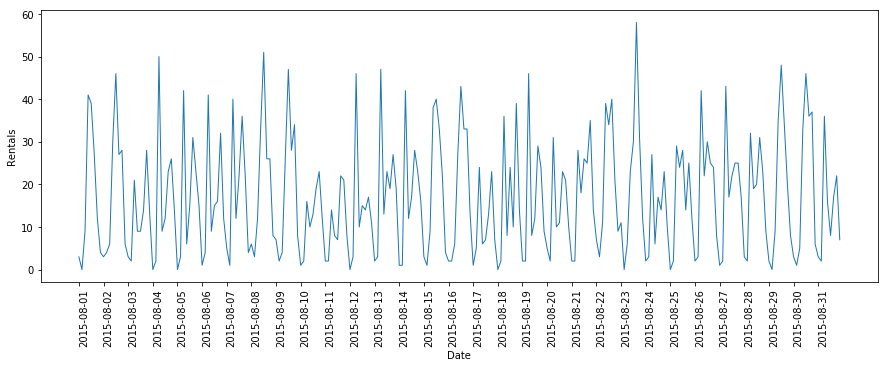

In [26]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15, 5))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%Y-%m-%d"), rotation=90, ha="left")
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.plot(citibike, linewidth=1);